In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryptocurrency-blockchain-and-stock-market-qa/text_corpus.jsonl
/kaggle/input/cryptocurrency-blockchain-and-stock-market-qa/KnowledgeBase Pdf Files - Crypto Currencies.csv
/kaggle/input/cryptocurrency-blockchain-and-stock-market-qa/train.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/cryptocurrency-blockchain-and-stock-market-qa/train.csv')
df.head()

,Unnamed: 0,question,answer,text
0,0,What significant challenges does the rapid exp...,"Balancing scalability and security, computatio...",###Human:\nAnswer this question in the context...
1,1,How does the proposed framework address the in...,By employing edge aggregating servers and Ethe...,###Human:\nAnswer this question in the context...
2,2,What are the primary benefits of using blockch...,"Data integrity, device authentication, and pro...",###Human:\nAnswer this question in the context...
3,3,Why are traditional blockchain-based solutions...,"Due to scalability, cost issues, and computati...",###Human:\nAnswer this question in the context...
4,4,How does the proposed framework ensure data pr...,Through the use of Zero-Knowledge Proofs (ZKPs...,###Human:\nAnswer this question in the context...


In [5]:
df.columns

Index(['Unnamed: 0', 'question', 'answer', 'text'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  804 non-null    int64 
 1   question    804 non-null    object
 2   answer      804 non-null    object
 3   text        804 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.3+ KB


In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(inplace=True)
df.head()

,question,answer,text
0,What significant challenges does the rapid exp...,"Balancing scalability and security, computatio...",###Human:\nAnswer this question in the context...
1,How does the proposed framework address the in...,By employing edge aggregating servers and Ethe...,###Human:\nAnswer this question in the context...
2,What are the primary benefits of using blockch...,"Data integrity, device authentication, and pro...",###Human:\nAnswer this question in the context...
3,Why are traditional blockchain-based solutions...,"Due to scalability, cost issues, and computati...",###Human:\nAnswer this question in the context...
4,How does the proposed framework ensure data pr...,Through the use of Zero-Knowledge Proofs (ZKPs...,###Human:\nAnswer this question in the context...


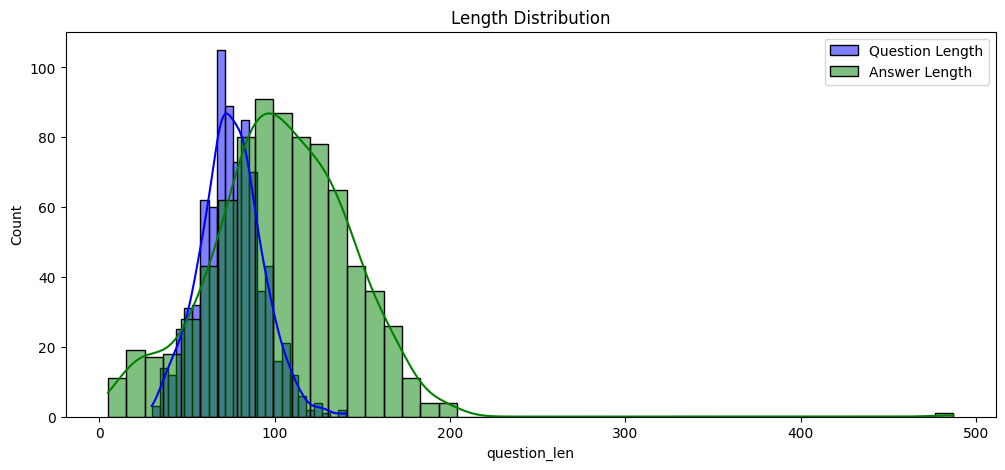

In [8]:
# Length of questions and answers
df['question_len'] = df['question'].apply(len)
df['answer_len'] = df['answer'].apply(len)

plt.figure(figsize=(12,5))
sns.histplot(df['question_len'], color='blue', label='Question Length', kde=True)
sns.histplot(df['answer_len'], color='green', label='Answer Length', kde=True)
plt.legend(); plt.title("Length Distribution"); plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine text + question for better prediction
df['combined'] = df['text'] + " " + df['question']

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['combined'], df['answer'], test_size=0.2, random_state=42)

In [11]:
# Convert text to vectors
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Predict
preds = model.predict(X_test_vec)

# Accuracy (on string data, it's more of a rough score)
print("Model Score:", accuracy_score(y_test, preds))

Model Score: 0.012422360248447204


In [14]:
results = pd.DataFrame({'Question': X_test.values[:5], 
                        'Actual Answer': y_test.values[:5], 
                        'Predicted Answer': preds[:5]})
results

,Question,Actual Answer,Predicted Answer
0,###Human:\nAnswer this question in the context...,"By showing that small, often imperceptible, mo...",By leveraging blockchain platforms designed fo...
1,###Human:\nAnswer this question in the context...,There is a positive correlation between ESG in...,"By identifying the best-fitting distributions,..."
2,###Human:\nAnswer this question in the context...,"Through predictive capabilities, early disaste...","By identifying the best-fitting distributions,..."
3,###Human:\nAnswer this question in the context...,The heatmap matrix visualizes the diverse trad...,Raspberry Pi serves as an affordable and effic...
4,###Human:\nAnswer this question in the context...,"The IRS treats cryptocurrencies as property, n...","Cryptocurrencies' unique market dynamics, incl..."
